# Business case of an American multinational retail corporation

### Goal:
    To understand if the spending habits differ between male and female customers.

### Importing necessary libraries

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Reading the CSV file and creating a dataframe

In [11]:
df = pd.read_csv(r"D:\01 STUDY MATERIALS\SCALER\Core Module\Walmart - Biz Case\walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### EXPLORATORY ANALYSIS

### Non - Graphical Analysis:

In [12]:
df.shape

(550068, 10)

**Observation**:
More than 5.5 lakhs rows of data is available.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Observation:**
There is no null values in the data.

In [14]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


**Observations:**
* The average purchase amount of the given data is 9263.96,
* The standard deviation is 5023.06,
* The minimum and the maximum purchase amount was 12 and 23961 respectively.

In [18]:
df["Age"].value_counts(normalize = True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

**Insight:**
* Almost 40 % of the purchase were made by the customers between the age of 26 - 35

In [22]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

**Observation:**
* The data provided is for 414259 Males and 135809 Females

In [23]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

**Observation:**
* The customers from the city category B has most number of purchases in the given data.

In [26]:
pd.crosstab(df['Gender'], df['Age'], normalize = 'index')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,0.037428,0.181343,0.373701,0.200060,0.097188,0.072852,0.037428
M,0.024185,0.181123,0.407559,0.199979,0.078458,0.069056,0.039639


**Insight:**
* Almost 41% of male customers and 37% of female customers who made purchase belongs to the age category of 26 - 35.

In [28]:
pd.crosstab(df['Gender'], df['Marital_Status'], normalize = 'index')

Marital_Status,0,1
Gender,,
F,0.580381,0.419619
M,0.593614,0.406386


**Insight:**
* Almost 60% of the purchases were made by the unmarried male and female customers. In other words, the single male and female customers tends to buy more than the married customers

### Visual analysis:

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


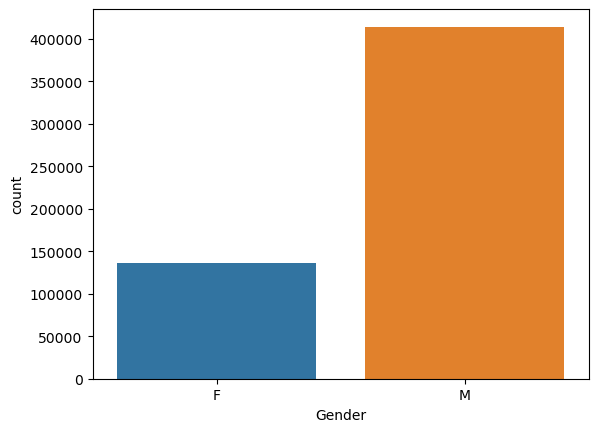

In [31]:
sns.countplot(x = df['Gender'])
plt.show()

**Observation:**
* The purchase data of the male customers contributes more in the given data

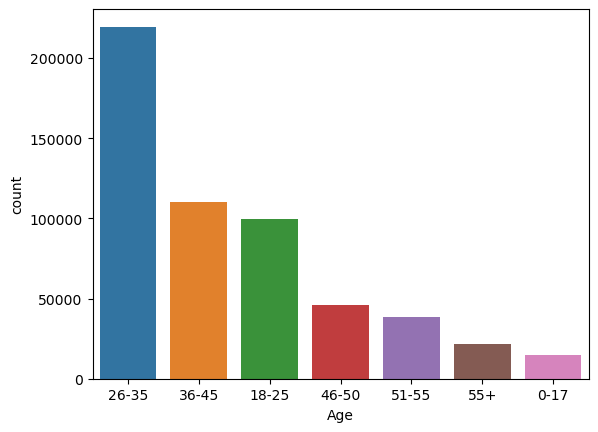

In [41]:
sns.countplot(x = df['Age'], order = df['Age'].value_counts().index)
plt.show()

**Insight:**
* The top 3 age categories are 26-35(mid), 36-45(old), 18-25(young)

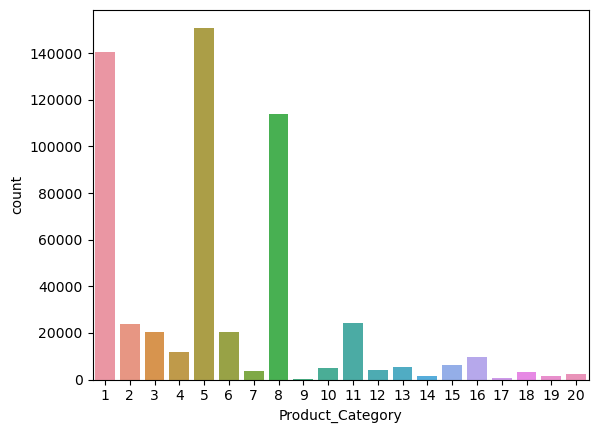

In [33]:
sns.countplot(x = df['Product_Category'])
plt.show()

**Insight:**
* The top 3 product categories on black friday are 5, 1, and 8.

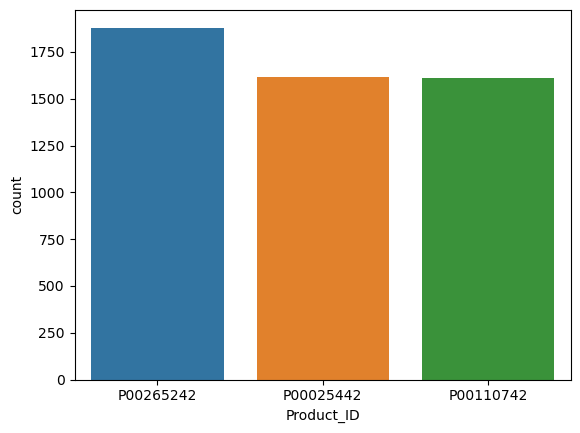

In [35]:
sns.countplot(x = df['Product_ID'], order = df['Product_ID'].value_counts().index[:3])
plt.show()

**Insight:**
* The top 3 products sold in the black friday are **P00265242, P00025442, P00110742**

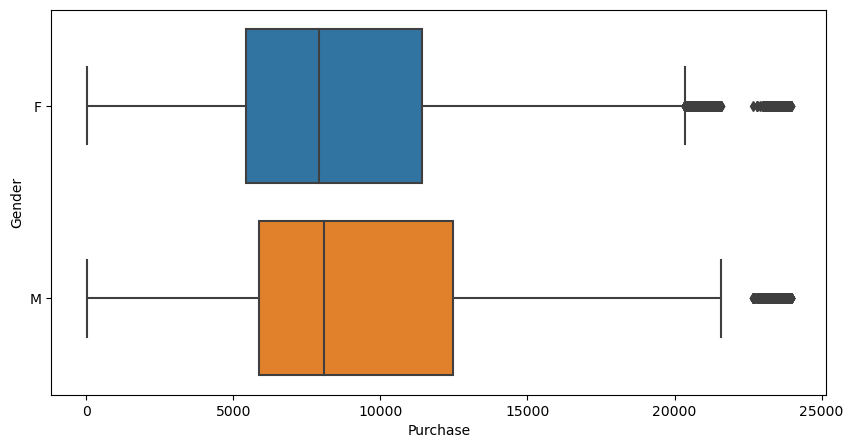

In [38]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['Purchase'], y = df['Gender'])
plt.show()

**Insight:**
* The median purchase amount of the male customers are bit higher than the median purchase amount of the female cusrtomers.
* The female customers have more outliers than the male customers

**Tracking the amount spent per transaction for different gender**

In [39]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

**Insight:**
* The average amount spent per transaction for the male is 9437.5 and for female, it is 8734.5
* On average, the male customers spend more than the female customers per transaction on black friday.

Lets find the average amount spent per transaction for all the male and female customers using CLT

In [42]:
# Separating the male and female purchase data

male = df.loc[df['Gender']=='M']

female = df.loc[df['Gender']=='F']

***Bootstrapping:***

In [43]:
# Lets create a function for bootstrapping so that it can be used later

def bootstrap(series, samples, trials):
    sample_means = []
    for t in range(trials):
        s = series.sample(samples)
        mean = s.mean()
        sample_means.append(mean)
    return sample_means

Lets do bootstrapping for male and female customers with 300 samples and 1000 repetitions and observe the distribution of them.

In [51]:
male_sample_means = bootstrap(male['Purchase'], 300, 1000)
female_sample_means = bootstrap(female['Purchase'], 300, 1000)

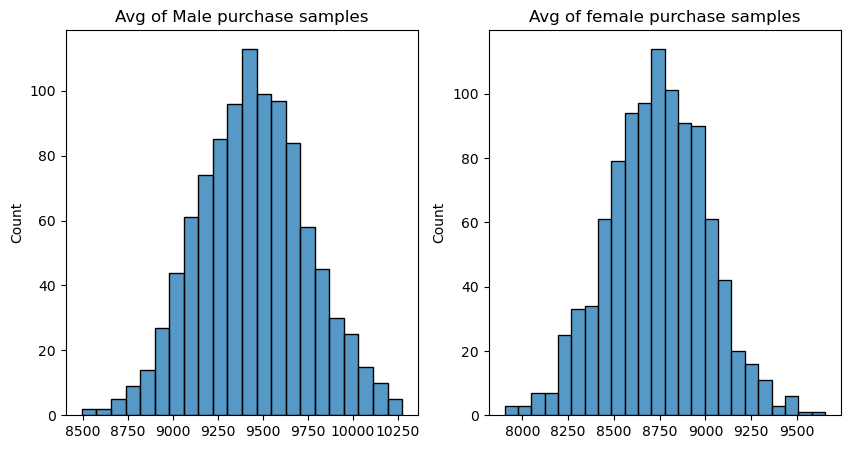

In [54]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Avg of Male purchase samples')
sns.histplot(male_sample_means)

plt.subplot(1,2,2)
sns.histplot(female_sample_means)
plt.title('Avg of female purchase samples')
plt.show()

The distribution looks like gaussian, but not very smooth. So lets increase the sample size and repetitions to make it even smoothier.

In [57]:
male_sample_means = bootstrap(male['Purchase'], 3000, 10000)
female_sample_means = bootstrap(female['Purchase'], 3000, 10000)

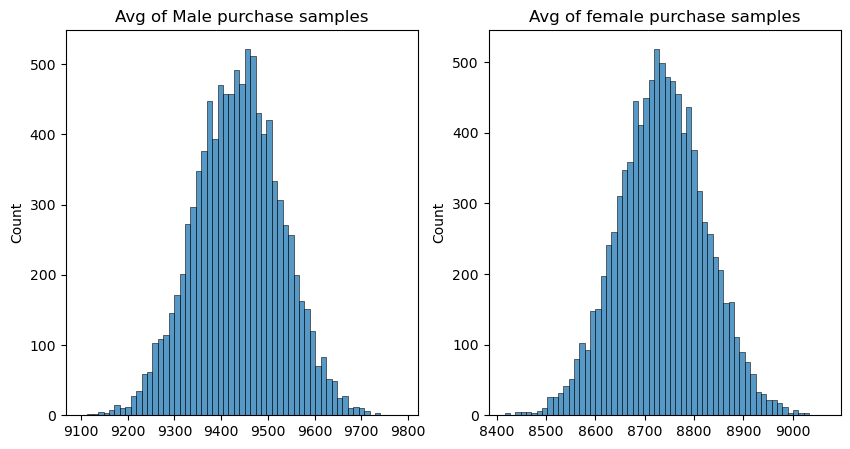

In [58]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Avg of Male purchase samples')
sns.histplot(male_sample_means)

plt.subplot(1,2,2)
sns.histplot(female_sample_means)
plt.title('Avg of female purchase samples')
plt.show()

Now the curve looks smoother. Lets increase the sample size even more and observe the distribution.

In [59]:
male_sample_means = bootstrap(male['Purchase'], 10000, 10000)
female_sample_means = bootstrap(female['Purchase'], 10000, 10000)

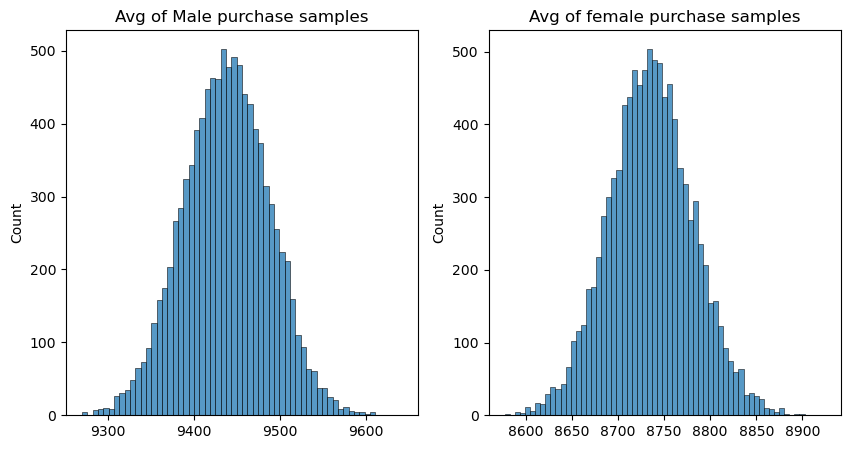

In [60]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Avg of Male purchase samples')
sns.histplot(male_sample_means)

plt.subplot(1,2,2)
sns.histplot(female_sample_means)
plt.title('Avg of female purchase samples')
plt.show()

Now we got even smoother curve. Lets use this data to find the confidence intervals

In [61]:
# Lets find the standard deviation of the population before calculating the CI
std_pop = df['Purchase'].std()
std_pop

5023.065393820627

In [62]:
# Mean of the bootstrapped sample means of male customers
mu_male = np.mean(male_sample_means)
mu_male

9437.75811743

In [63]:
# Mean of the bootstrapped sample means of female customers
mu_female = np.mean(female_sample_means)
mu_female

8735.22981491

***Confidence Interval:***

In [49]:
# Lets create a function for calculating the Confidence Interval using CLT

def ci(interval, mu, sigma, n):
    z_left = norm.ppf(((100-interval)/2)/100)
    z_right = norm.ppf(((100+interval)/2)/100)
    left = mu + (z_left*(sigma/np.sqrt(n)))
    right = mu + (z_right*(sigma/np.sqrt(n)))
    return left, right

### 90% CI
Lets find the 90% confidence interval for the average amount spent per transaction for male and female customers

In [64]:
male90 = ci(90, mu_male, std_pop, 10000)
male90

(9355.136044115596, 9520.380190744403)

In [65]:
female90 = ci(90, mu_female, std_pop, 10000)
female90

(8652.607741595597, 8817.851888224404)

### 95% CI
Lets find the 95% confidence interval for the average amount spent per transaction for male and female customers

In [66]:
male95 = ci(95, mu_male, std_pop, 10000)
male95

(9339.30784479122, 9536.20839006878)

In [67]:
female95 = ci(95, mu_female, std_pop, 10000)
female95

(8636.77954227122, 8833.68008754878)

### 99% CI
Lets find the 99% confidence interval for the average amount spent per transaction for male and female customers

In [68]:
male99 = ci(99, mu_male, std_pop, 10000)
male99

(9308.372527079544, 9567.143707780455)

In [69]:
female99 = ci(99, mu_female, std_pop, 10000)
female99

(8605.844224559545, 8864.615405260456)

**Insights:**
* We can say with 99% confidence that the average amount spent per transaction of the male lies between the range 9308 and 9567,
* Also we can say with 99% confidence that the average amount spent per transaction of the female lies between the range 8605 and 8864,
* It is clear from the above observation that the male spend more than women on average per transaction

**Tracking the amount spent per transaction for different marital status**

In [80]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

**Insight:**
* The average amount spent per transaction for single customer is 9265.9 and for married customer, it is 9261.1
* On average, the single customers spend slightly more than the married customers per transaction on black friday.

Lets find the average amount spent per transaction for all the single and married customers using CLT

In [77]:
# Separating the single and married purchase data

single = df.loc[df['Marital_Status']==0]

married = df.loc[df['Marital_Status']==1]

***Bootstrapping:***

Lets do bootstrapping for single and married customers with 10000 samples and 1000 repetitions and observe the distribution of them.

In [78]:
single_sample_means = bootstrap(single['Purchase'], 10000, 1000)
married_sample_means = bootstrap(married['Purchase'], 10000, 1000)

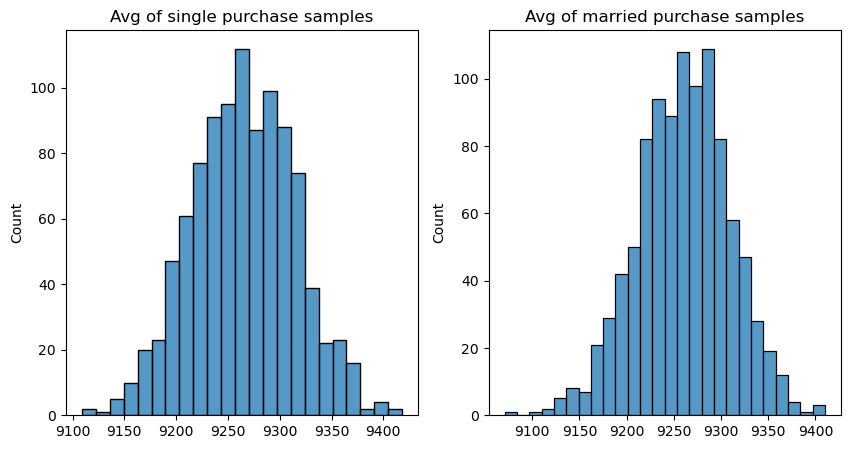

In [79]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('Avg of single purchase samples')
sns.histplot(single_sample_means)

plt.subplot(1,2,2)
sns.histplot(married_sample_means)
plt.title('Avg of married purchase samples')
plt.show()

Lets find the confidence intervals

In [81]:
# Mean of the bootstrapped sample means of single customers
mu_single = np.mean(single_sample_means)
mu_single

9265.2569424

In [82]:
# Mean of the bootstrapped sample means of married customers
mu_married = np.mean(married_sample_means)
mu_married

9260.5753792

***Confidence Interval:***

### 90% CI
Lets find the 90% confidence interval for the average amount spent per transaction for single and married customers

In [83]:
single90 = ci(90, mu_single, std_pop, 10000)
single90

(9182.634869085596, 9347.879015714403)

In [84]:
married90 = ci(90, mu_married, std_pop, 10000)
married90

(9177.953305885596, 9343.197452514403)

### 95% CI
Lets find the 95% confidence interval for the average amount spent per transaction for single and married customers

In [85]:
single95 = ci(95, mu_single, std_pop, 10000)
single95

(9166.80666976122, 9363.70721503878)

In [86]:
married95 = ci(95, mu_married, std_pop, 10000)
married95

(9162.12510656122, 9359.02565183878)

### 99% CI
Lets find the 99% confidence interval for the average amount spent per transaction for single and married customers

In [87]:
single99 = ci(99, mu_single, std_pop, 10000)
single99

(9135.871352049544, 9394.642532750455)

In [88]:
married99 = ci(99, mu_married, std_pop, 10000)
married99

(9131.189788849544, 9389.960969550455)

**Insights:**
* We can say with 99% confidence that the average amount spent per transaction of the single customer lies between the range 9135 and 9394,
* Also we can say with 99% confidence that the average amount spent per transaction of the married customer lies between the range 9131 and 9389,
* It is clear that the single and married customers have overlapping of confidence intervals. Therefore, the average amount spent per transaction for the single and married customers will be very close to each other

**Tracking the amount spent per transaction for different age categories**

In [89]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

**Insight:**
* The highest average amount spent per transaction is 9534.8 by the customers of age category 51 - 55
* The lowest average amount spent per transaction is 8933 by the customers of age category 0 - 17

Lets find the average amount spent per transaction for all the top 3(in no. of purchases) age category customers using CLT

In [90]:
# Separating the data

mid = df.loc[df['Age']=='26-35']

old = df.loc[df['Age']=='36-45']

young = df.loc[df['Age']=='18-25']

***Bootstrapping:***

In [91]:
mid_sample_means = bootstrap(mid['Purchase'], 10000, 1000)
old_sample_means = bootstrap(old['Purchase'], 10000, 1000)
young_sample_means = bootstrap(young['Purchase'], 10000, 1000)

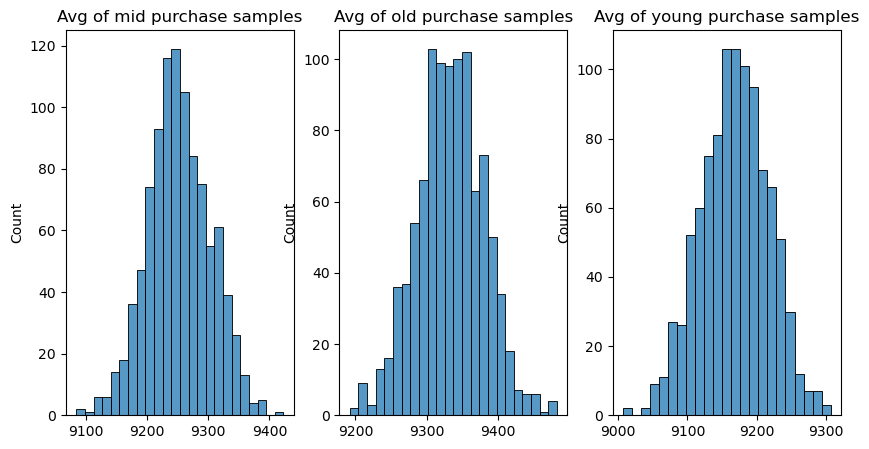

In [92]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.title('Avg of mid purchase samples')
sns.histplot(mid_sample_means)

plt.subplot(1,3,2)
plt.title('Avg of old purchase samples')
sns.histplot(old_sample_means)

plt.subplot(1,3,3)
sns.histplot(young_sample_means)
plt.title('Avg of young purchase samples')
plt.show()

Lets find the confidence intervals

In [93]:
mu_mid = np.mean(mid_sample_means)
mu_mid

9252.6767178

In [94]:
mu_old = np.mean(old_sample_means)
mu_old

9332.9092538

In [95]:
mu_young = np.mean(young_sample_means)
mu_young

9168.318768199999

***Confidence Interval:***

### 95% CI
Lets find the 95% confidence interval for the average amount spent per transaction for customers of different age categories

In [96]:
mid95 = ci(95, mu_mid, std_pop, 10000)
mid95

(9154.226445161219, 9351.12699043878)

In [97]:
old95 = ci(95, mu_old, std_pop, 10000)
old95

(9234.45898116122, 9431.35952643878)

In [98]:
young95 = ci(95, mu_young, std_pop, 10000)
young95

(9069.868495561219, 9266.769040838779)

### 99% CI
Lets find the 99% confidence interval for the average amount spent per transaction for customers of different age categories

In [99]:
mid99 = ci(99, mu_mid, std_pop, 10000)
mid99

(9123.291127449544, 9382.062308150455)

In [100]:
old99 = ci(99, mu_old, std_pop, 10000)
old99

(9203.523663449545, 9462.294844150456)

In [101]:
young99 = ci(99, mu_young, std_pop, 10000)
young99

(9038.933177849543, 9297.704358550454)

**Insight:**
* The customers of top 3 age categories (26 - 35, 36 - 45,& 18 - 25) have overlapping confidence intervals. Therefore, the average amount spent per transaction for them will be very close to each other.

### Insights:
* The average purchase amount of the given data is 9263.96,
* The standard deviation is 5023.06,
* The minimum and the maximum purchase amount was 12 and 23961 respectively.
* Almost 40 % of the purchase were made by the customers between the age of 26 - 35
* Almost 41% of male customers and 37% of female customers who made purchase belongs to the age category of 26 - 35.
* Almost 60% of the purchases were made by the unmarried male and female customers. In other words, the single male and female customers tends to buy more than the married customers
* The top 3 age categories are 26-35(mid), 36-45(old), 18-25(young)
* The top 3 product categories on black friday are 5, 1, and 8.
* The top 3 products sold in the black friday are P00265242, P00025442, P00110742
* The median purchase amount of the male customers are bit higher than the median purchase amount of the female cusrtomers.
* The female customers have more outliers than the male customers
* The average amount spent per transaction for the male is 9437.5 and for female, it is 8734.5
* On average, the male customers spend more than the female customers per transaction on black friday.
* We can say with 99% confidence that the average amount spent per transaction of the male lies between the range 9308 and 9567,
* Also we can say with 99% confidence that the average amount spent per transaction of the female lies between the range 8605 and 8864,
* It is clear from the above observation that the male spend more than women on average per transaction
* The average amount spent per transaction for single customer is 9265.9 and for married customer, it is 9261.1
* On average, the single customers spend slightly more than the married customers per transaction on black friday.
* We can say with 99% confidence that the average amount spent per transaction of the single customer lies between the range 9135 and 9394,
* Also we can say with 99% confidence that the average amount spent per transaction of the married customer lies between the range 9131 and 9389,
* It is clear that the single and married customers have overlapping of confidence intervals. Therefore, the average amount spent per transaction for the single and married customers will be very close to each other
* The highest average amount spent per transaction is 9534.8 by the customers of age category 51 - 55
* The lowest average amount spent per transaction is 8933 by the customers of age category 0 - 17
* The customers of top 3 age categories (26 - 35, 36 - 45,& 18 - 25) have overlapping confidence intervals. Therefore, the average amount spent per transaction for them will be very close to each other.

### Recommendations:
* It is recommended to get more stock of products for  male customers as they buy more on the black friday,
* It is recommended to ensure the availability of the products P00265242, P00025442, P00110742 before black friday as they were the most sold products,
* It is recommended that the walmart should roll out more offers for female customers as they spend less than male customers on black friday,
* It is recommended to get more new product for female customers of age category 26 - 35 in the price range of 8605 to 8864,
* It is recommended to get only lesser number of products, but costlier products for customers of age category 51 - 55,
* It is recommended to ensure the availability of the products in the category 5, 1, and 8 before black friday as they were the most sold product category.
